In [2]:
#Install the required libraries
#!pip install jupyter_bokeh --upgrade - used specifically for geo visualiztion
#!pip install hvplot --upgrade - for using hvplotlib forvisulaizations
#!pip install prophet - for doing projections


In [3]:
#import supporting liberaries - Panda, Matplotlib, Prophet, Numpy, hvplot
import pandas as pd
import matplotlib.pyplot as plt
#import prophet as Prophet
import numpy as np
import datetime as dt
import hvplot.pandas
import panel as pn # for panels to use with hvplot.points


In [4]:
#upload ufoSighting.csv - available at https://docs.google.com/spreadsheets/d/1iNNPzkDTDiaTnbYqBY4ELH_0rPts2uXgl_JSdKCEgUE/edit?usp=drive_link
path = 'resources/ufoSightings.csv'

In [5]:
#importing csv file in a dataframe
ufo_sightings_df = pd.read_csv(path,
                 #index_col="datetime",
                 parse_dates=['datetime'],
                 infer_datetime_format=True
                )

# Preview the dataset
ufo_sightings_df.head()

C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\1677288385.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ufo_sightings_df = pd.read_csv(path,
C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\1677288385.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_sightings_df = pd.read_csv(path,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
#cast datetime column as datetime datatype - #convert datetime column to datetime format
ufo_sightings_df['datetime'] = pd.to_datetime(ufo_sightings_df['datetime'], errors='coerce')
#checking to ensure datatype conversion
ufo_sightings_df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

In [7]:
#create a slice for country=us and drop any Nan values and display first 5 and last 5 columns
us_ufo_df = ufo_sightings_df[ufo_sightings_df['country'] == 'us']
us_ufo_df = us_ufo_df.dropna(how='any')
display(us_ufo_df.head())
display(us_ufo_df.tail())

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
80331,2013-09-09 23:00:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778


In [8]:
#drop unwanted columns like duration hour/min, comments, date posted and verify
cleaned_us_ufo_df = us_ufo_df.drop(columns=['duration (hours/min)', 'comments', 'date posted'])
cleaned_us_ufo_df.dtypes

datetime              datetime64[ns]
city                          object
state                         object
country                       object
shape                         object
duration (seconds)            object
latitude                      object
longitude                    float64
dtype: object

In [9]:
#sorting data by datetime column
cleaned_us_ufo_df.sort_values(by=['datetime'], inplace=True)
cleaned_us_ufo_df.shape

(63099, 8)

In [10]:
#Checking range data available in dataset
display(cleaned_us_ufo_df['datetime'].min())
cleaned_us_ufo_df['datetime'].max()

Timestamp('1910-06-01 15:00:00')

Timestamp('2014-05-08 00:00:00')

In [11]:
#casting duration in seconds to float to perform agreegation
cleaned_us_ufo_df['duration (seconds)'] = pd.to_numeric(cleaned_us_ufo_df['duration (seconds)'], errors='coerce')

#check to ensure conversion of column type
cleaned_us_ufo_df.dtypes

datetime              datetime64[ns]
city                          object
state                         object
country                       object
shape                         object
duration (seconds)           float64
latitude                      object
longitude                    float64
dtype: object

In [12]:
#add a column for year by extracting from datetime column to use for grouping and display last (10) records
cleaned_us_ufo_df['year'] = cleaned_us_ufo_df['datetime'].dt.year
cleaned_us_ufo_df.tail(10)

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
46144,2014-05-07 03:30:00,calera,al,us,circle,240.0,33.1027778,-86.753611,2014
46145,2014-05-07 09:30:00,port richey,fl,us,unknown,1.0,28.2713889,-82.719722,2014
46147,2014-05-07 15:00:00,san jose,ca,us,disk,30.0,37.3394444,-121.893889,2014
46148,2014-05-07 17:30:00,lakeville,mn,us,oval,90.0,44.6497222,-93.242500,2014
46151,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.3302778,-119.291111,2014
46150,2014-05-07 20:30:00,seagrove beach,fl,us,fireball,60.0,30.3183333,-86.130278,2014
46152,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.5475,-88.175278,2014
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.4858333,-73.051111,2014
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.2322222,-90.562778,2014
46301,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.1494444,-90.048889,2014


In [13]:
cleaned_us_ufo_df_copy = cleaned_us_ufo_df.copy()
cleaned_us_ufo_df_copy.dropna()
cleaned_us_ufo_df_copy.tail()
# drop NaT values from datetime
cleaned_us_ufo_df_copy = cleaned_us_ufo_df_copy[cleaned_us_ufo_df_copy['datetime'].notna()]
cleaned_us_ufo_df_copy.tail()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
46150,2014-05-07 20:30:00,seagrove beach,fl,us,fireball,60.0,30.3183333,-86.130278,2014
46152,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.5475,-88.175278,2014
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.4858333,-73.051111,2014
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.2322222,-90.562778,2014
46301,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.1494444,-90.048889,2014


,duration (seconds)
year,
1995,1956.6
1996,7091.0
1997,2916.8
1998,1125.5
1999,1048.6
2000,959.8
2001,1363.3
2002,27054.8
2003,1172.9


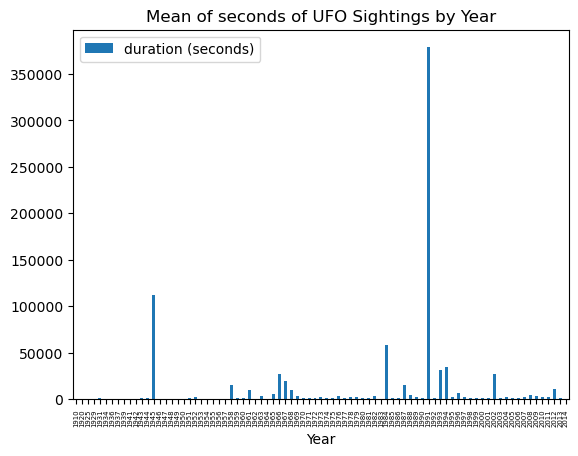

In [14]:
#create a pivot table for average sighting duration by year and visualize bar graph
us_ufo_df_year_avg = pd.pivot_table(cleaned_us_ufo_df,
                                    index='year',
                                    values='duration (seconds)',
                                    aggfunc='mean').round(1)
display(us_ufo_df_year_avg.tail(20))
yearavg = us_ufo_df_year_avg.plot(kind='bar', title='Mean of seconds of UFO Sightings by Year')
plt.xticks(rotation=90, fontsize=5)
yearavg.set_xlabel("Year")
plt.show()


,duration (seconds)
year,
1985,167
1986,146
1987,171
1988,182
1989,189
1990,187
1991,177
1992,178
1993,221


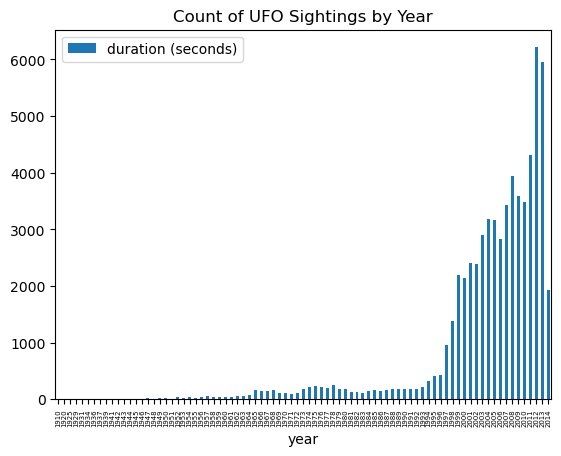

In [15]:
#create a pivot table for count of  sighting by year and visualize bar graph
us_ufo_df_year = pd.pivot_table(cleaned_us_ufo_df,
                             index='year',
                             values='duration (seconds)',
                             aggfunc='count').round(1)
display(us_ufo_df_year.tail(30))
us_ufo_df_year.plot(kind='bar', title='Count of UFO Sightings by Year')
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [16]:
#create a dateframe from us_ufo_df_year where duration (seconds) is greater than 300
us_ufo_df_year_over_300 = us_ufo_df_year[us_ufo_df_year['duration (seconds)'] > 300]

#take 1st value of index and store it to variable named selected
selected = us_ufo_df_year_over_300.index[0]

In [17]:
#group a dataframe by state and aggregate by count and sum

cleaned_us_ufo_df.groupby('state').agg({'duration (seconds)': ['count', 'sum', 'mean']}).head()

duration (seconds)                            
                   count          sum           mean
state                                               
ak                   303   1021662.00    3371.821782
al                   625    889050.50    1422.480800
ar                   569  66983744.20  117721.870299
az                  2348  15443101.60    6577.130153
ca                  8620  23938330.47    2777.068500

In [18]:
#based on analysis, extracting data for year which has data over 300
cleaned_us_ufo_df_new = cleaned_us_ufo_df[cleaned_us_ufo_df['year'] >= selected]
cleaned_us_ufo_df_new.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
10885,1994-01-01 00:00:00,el segundo,ca,us,other,1800.0,33.9191667,-118.415556,1994
10887,1994-01-01 18:00:00,ringwood,nj,us,unknown,240.0,41.1133333,-74.245833,1994
24283,1994-01-03 23:30:00,albuquerque (30-60 miles west of city),nm,us,triangle,240.0,35.0844444,-106.650556,1994
24471,1994-01-04 23:00:00,susquehanna,pa,us,triangle,300.0,41.9433333,-75.600000,1994
11891,1994-01-12 18:00:00,cedar key,fl,us,chevron,300.0,29.1383333,-83.035278,1994


In [19]:
#calculate count and avg duration anf group by state after 1990
us_ufo_state_count = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='count').round(1)
us_ufo_state_count = us_ufo_state_count.sort_values(by=['duration (seconds)'], ascending=False)
#Selecting top 10 states by count
top_10_states_count = us_ufo_state_count[:10]
top_10_states_count

,duration (seconds)
state,
ca,7930
fl,3491
wa,3470
tx,3007
ny,2522
az,2255
il,2235
pa,2080
oh,1992


In [20]:
#agregate by mean and create a pivot table
us_ufo_state_average = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='mean').round(1)
#sorting values by 'duration (seconds)' column
us_ufo_state_average =us_ufo_state_average.sort_values(by=['duration (seconds)'], ascending=False)
#creating top 10
top_10_states_average = us_ufo_state_average[:10]
top_10_states_average

,duration (seconds)
state,
hi,29100.3
wa,16250.7
fl,15898.8
la,14335.9
va,11981.1
ms,10941.6
wv,7497.7
ut,5979.3
nm,4631.1


In [21]:
#agregate by sum and create a pivot table
us_ufo_state_total_seconds = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='sum').round(1)

us_ufo_state_total_seconds =us_ufo_state_total_seconds.sort_values(by=['duration (seconds)'], ascending=False)
#creating top 10
top_10_states_sum  = us_ufo_state_total_seconds[:10]
top_10_states_sum

,duration (seconds)
state,
wa,56389887.4
fl,55502855.0
ca,21518701.5
va,13514651.0
ny,8544800.4
la,6752194.0
hi,6693062.0
az,6520462.6
tx,4136171.2


In [22]:
#merging count of states and states average duration
us_ufo_state_df = pd.merge(us_ufo_state_count, us_ufo_state_average, on='state')
#renaming columns for ease of reading
us_ufo_state_df.columns = ['count', 'average_duration']
display(us_ufo_state_df.head())
display(us_ufo_state_df.tail())

,count,average_duration
state,,
ca,7930,2713.6
fl,3491,15898.8
wa,3470,16250.7
tx,3007,1375.5
ny,2522,3388.1


,count,average_duration
state,,
wy,153,1003.8
de,145,809.8
nd,106,1195.4
pr,15,1630.2
dc,7,235.1


In [23]:
#using describe function to get agreegated and quantile data
us_ufo_state_df.describe()

,count,average_duration
count,52.000000,52.000000
mean,1106.596154,3588.584615
std,1284.706196,5303.259175
min,7.000000,235.100000
25%,409.750000,1023.825000
50%,730.500000,1383.900000
75%,1288.000000,3408.575000
max,7930.000000,29100.300000


In [24]:
#calculating top 10 and 20% of data in counts and average duration
count_percentile80 = us_ufo_state_df['count'].quantile(0.8)
count_percentile90 = us_ufo_state_df['count'].quantile(0.9)
avg_percentile80 = us_ufo_state_df['average_duration'].quantile(0.8)
avg_percentile90 = us_ufo_state_df['average_duration'].quantile(0.9)

print(f"90% quantile of average duration is {round(avg_percentile90,2)}")
print(f"80% quantile of average duration is {round(avg_percentile80,2)}")
print(f"90% quantile of count is {count_percentile90}")
print(f"80% quantile of count is {count_percentile80}")


90% quantile of average duration is 10597.21
80% quantile of average duration is 3902.66
90% quantile of count is 2253.0
80% quantile of count is 1566.4


In [75]:
# create a dataframe from us_ufo_state_df that has count and avg duration greater than or equalt to 90 percentile
us_ufo_state_top_df = us_ufo_state_df[(us_ufo_state_df['count'] >= count_percentile90) | (us_ufo_state_df['average_duration'] >= avg_percentile90)]
#sorting dataframe by state column
us_ufo_state_top_df = us_ufo_state_top_df.sort_values(by=["state"])
us_ufo_state_top_df.head()

,count,average_duration
state,,
az,2255,2891.6
ca,7930,2713.6
fl,3491,15898.8
hi,230,29100.3
la,471,14335.9


In [76]:
#add columns for calculating minutes and hour
us_ufo_state_top_df["average_duration_min"] = us_ufo_state_top_df['average_duration'] / 60
us_ufo_state_top_df["average_duration_hour"] = us_ufo_state_top_df['average_duration_min'] / 60
#resetting index
us_ufo_state_top_df.reset_index(inplace=True)
display(us_ufo_state_top_df)
max_minutes_top_states = us_ufo_state_top_df['average_duration_min'].max()
print(f"Max duration in minutes is {max_minutes_top_states}")

,state,count,average_duration,average_duration_min,average_duration_hour
0,az,2255,2891.6,48.193333,0.803222
1,ca,7930,2713.6,45.226667,0.753778
2,fl,3491,15898.8,264.980000,4.416333
3,hi,230,29100.3,485.005000,8.083417
4,la,471,14335.9,238.931667,3.982194
5,ms,303,10941.6,182.360000,3.039333
6,ny,2522,3388.1,56.468333,0.941139
7,tx,3007,1375.5,22.925000,0.382083
8,va,1128,11981.1,199.685000,3.328083
9,wa,3470,16250.7,270.845000,4.514083


Max duration in minutes is 485.005


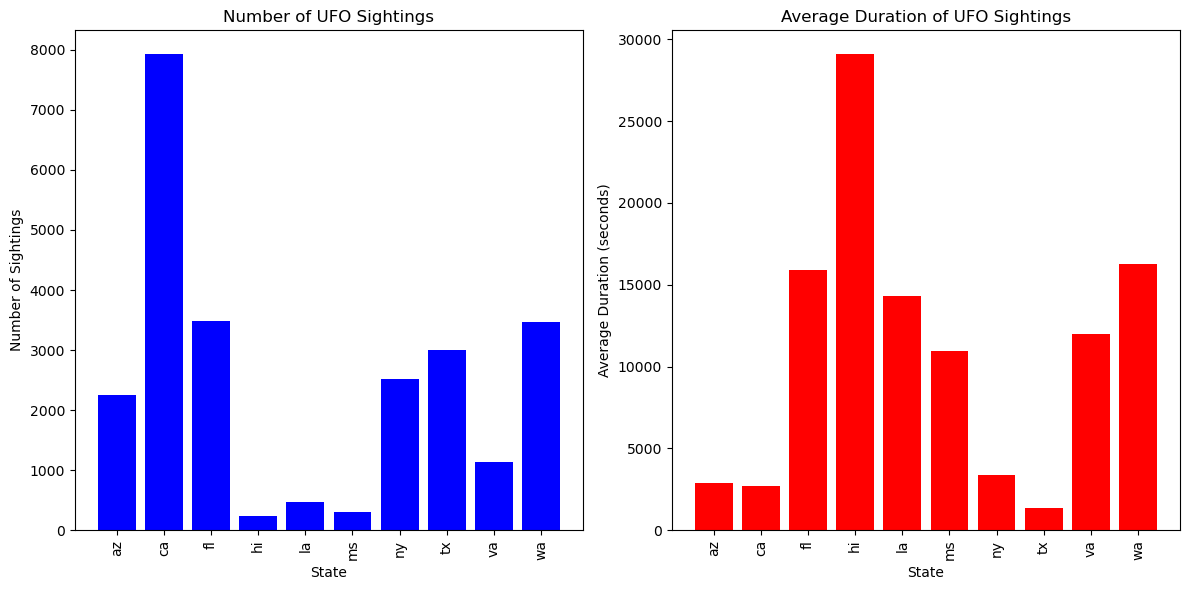

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a subplots to show data by counts and seconds side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the number of sightings on the first subplot
ax1.bar(us_ufo_state_top_df['state'], us_ufo_state_top_df['count'], color='blue')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Sightings')
ax1.set_title('Number of UFO Sightings')
ax1.tick_params(axis='x', rotation=90)

# Plot the average duration on the second subplot
ax2.bar(us_ufo_state_top_df['state'], us_ufo_state_top_df['average_duration'], color='red')
ax2.set_xlabel('State')
ax2.set_ylabel('Average Duration (seconds)')
ax2.set_title('Average Duration of UFO Sightings')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('images/ufo_sightings_subplots.png')


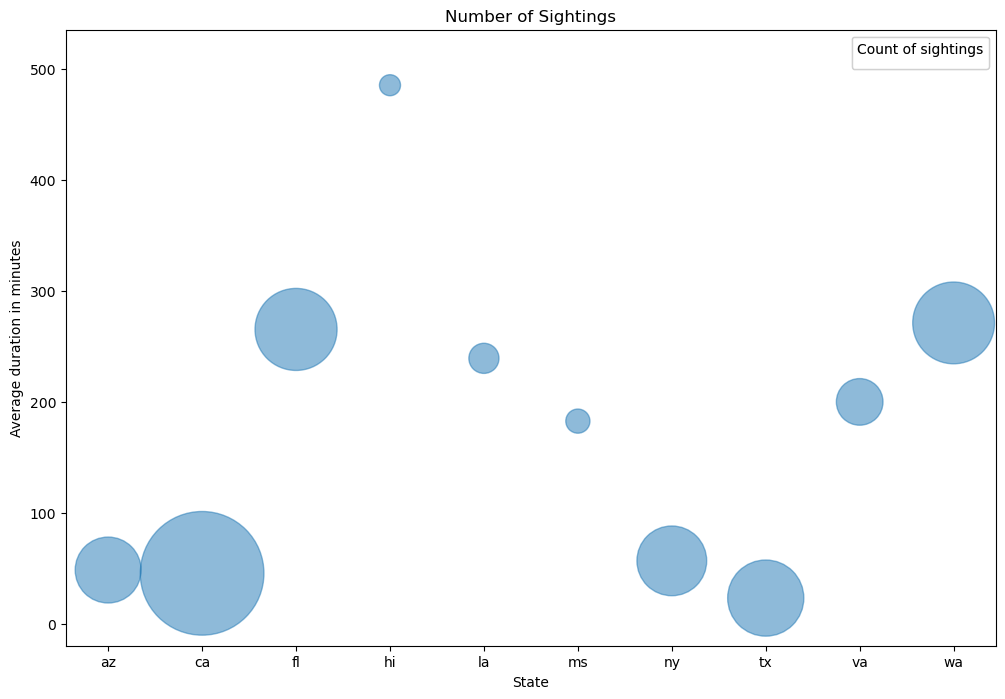

<Figure size 640x480 with 0 Axes>

In [79]:
#creatihg bubble chart to show states in top 90% counts
plt.figure(figsize=(12, 8))
fig = plt.scatter(us_ufo_state_top_df["state"], us_ufo_state_top_df["average_duration_min"], s=us_ufo_state_top_df["count"], alpha=0.5)
plt.ylim(-20, max_minutes_top_states+50)
plt.title("Count of Sightings")
plt.xlabel("State")
plt.ylabel("Average duration in minutes")
legend = plt.legend(*fig.legend_elements(), title="Count of sightings")
plt.gca().add_artist(legend)
plt.show(fig)
plt.savefig('images/bubble_chart_ufo_sightings_by_top_10_states.png')

In [29]:
# Calculate the correlation coefficient
correlation = us_ufo_state_top_df['count'].corr(us_ufo_state_top_df['average_duration_min'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.48557160943179895


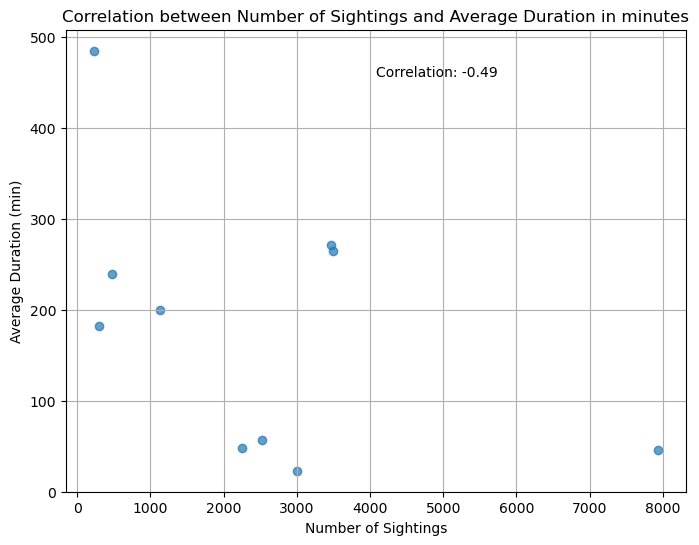

<Figure size 640x480 with 0 Axes>

In [30]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(us_ufo_state_top_df['count'], us_ufo_state_top_df['average_duration_min'], alpha=0.7)
plt.xlabel('Count of Sightings')
plt.ylabel('Average Duration (min)')
plt.title('Correlation: Count of Sightings and Average Duration (minutes)')

# Calculate and add the correlation coefficient to the plot
correlation = us_ufo_state_top_df['count'].corr(us_ufo_state_top_df['average_duration_min'])
plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

plt.grid(True)
plt.show()
plt.savefig('images/correlation_sighting_duration.png')


In [31]:
#limiting data to year 2013 as 2014 data is not for the full year
cleaned_us_ufo_df_new = cleaned_us_ufo_df_new[cleaned_us_ufo_df_new['datetime'] <= '2013-12-31']

In [32]:
florida_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'fl']
florida_seconds_sum_df = pd.pivot_table(florida_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
florida_seconds_sum_df = florida_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
florida_seconds_sum_df.reset_index(inplace=True)
florida_seconds_sum_df.head()

,datetime,total_seconds
0,1994-01-12 18:00:00,300.0
1,1994-04-04 17:00:00,7200.0
2,1994-04-15 22:00:00,1200.0
3,1994-06-12 21:30:00,720.0
4,1994-06-15 14:00:00,28800.0


In [33]:
washington_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'wa']
washington_seconds_sum_df = pd.pivot_table(washington_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
washington_seconds_sum_df = washington_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
washington_seconds_sum_df.reset_index(inplace=True)
washington_seconds_sum_df.head()

,datetime,total_seconds
0,1994-03-08 19:15:00,5.0
1,1994-03-10 21:00:00,10.0
2,1994-06-01 18:00:00,1800.0
3,1994-06-15 23:00:00,20.0
4,1994-06-20 21:00:00,180.0


In [34]:
california_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'ca']
california_seconds_sum_df = pd.pivot_table(california_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
california_seconds_sum_df = california_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
california_seconds_sum_df.reset_index(inplace=True)
california_seconds_sum_df.head()

,datetime,total_seconds
0,1994-01-01 00:00:00,1800.0
1,1994-01-14 18:00:00,300.0
2,1994-01-15 23:00:00,1800.0
3,1994-01-17 05:00:00,2.0
4,1994-01-24 22:00:00,300.0


In [35]:
hawaii_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'hi']
hawaii_seconds_sum_df = pd.pivot_table(hawaii_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
hawaii_seconds_sum_df = hawaii_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
hawaii_seconds_sum_df.reset_index(inplace=True)
hawaii_seconds_sum_df.head()

,datetime,total_seconds
0,1994-06-01 02:30:00,6.0
1,1994-09-04 17:00:00,10.0
2,1995-06-01 23:45:00,600.0
3,1995-06-15 20:00:00,20.0
4,1997-01-05 01:10:00,7200.0


In [36]:
arizona_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'az']
arizona_seconds_sum_df = pd.pivot_table(arizona_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
arizona_seconds_sum_df = arizona_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
arizona_seconds_sum_df.reset_index(inplace=True)
arizona_seconds_sum_df.head()

,datetime,total_seconds
0,1994-03-10 22:30:00,90.0
1,1994-04-15 23:00:00,180.0
2,1994-05-15 21:15:00,1200.0
3,1994-07-15 03:00:00,1200.0
4,1994-08-04 23:00:00,300.0


In [37]:
louisiana_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'la']
louisiana_seconds_sum_df = pd.pivot_table(louisiana_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
louisiana_seconds_sum_df = louisiana_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
louisiana_seconds_sum_df.reset_index(inplace=True)
louisiana_seconds_sum_df.head()

,datetime,total_seconds
0,1994-04-11 21:00:00,30.0
1,1995-06-15 02:00:00,60.0
2,1995-09-23 23:00:00,60.0
3,1995-10-05 21:30:00,600.0
4,1996-02-01 15:00:00,180.0


In [38]:
mississippi_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'ms']
mississippi_seconds_sum_df = pd.pivot_table(mississippi_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
mississippi_seconds_sum_df = mississippi_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
mississippi_seconds_sum_df.reset_index(inplace=True)
mississippi_seconds_sum_df.head()

,datetime,total_seconds
0,1994-03-24 23:30:00,240.0
1,1994-04-25 21:00:00,2.0
2,1994-07-15 22:00:00,4.0
3,1994-11-15 04:00:00,240.0
4,1995-02-15 07:30:00,300.0


In [39]:
newyork_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'ny']
newyork_seconds_sum_df = pd.pivot_table(newyork_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
newyork_seconds_sum_df = newyork_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
newyork_seconds_sum_df.reset_index(inplace=True)
newyork_seconds_sum_df.head()

,datetime,total_seconds
0,1994-02-27 00:15:00,300.0
1,1994-03-03 00:00:00,21600.0
2,1994-04-25 22:00:00,60.0
3,1994-05-05 02:00:00,300.0
4,1994-05-11 22:00:00,15.0


In [40]:
texas_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'tx']
texas_seconds_sum_df = pd.pivot_table(texas_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
texas_seconds_sum_df = texas_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
texas_seconds_sum_df.reset_index(inplace=True)
texas_seconds_sum_df.head()

,datetime,total_seconds
0,1994-04-01 15:00:00,600.0
1,1994-06-01 02:00:00,14400.0
2,1994-06-04 10:00:00,2.0
3,1994-07-15 12:00:00,120.0
4,1994-08-15 19:30:00,120.0


In [41]:
virginia_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'va']
virginia_seconds_sum_df = pd.pivot_table(virginia_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
virginia_seconds_sum_df = virginia_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
virginia_seconds_sum_df.reset_index(inplace=True)
virginia_seconds_sum_df.head()

,datetime,total_seconds
0,1994-04-19 22:00:00,240.0
1,1994-06-18 23:00:00,180.0
2,1994-11-15 21:45:00,10.0
3,1995-03-15 05:25:00,600.0
4,1995-04-04 04:00:00,1500.0


In [42]:
national_seconds_sum_df = pd.pivot_table(cleaned_us_ufo_df_new,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
national_seconds_sum_df = national_seconds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
national_seconds_sum_df.reset_index(inplace=True)
national_seconds_sum_df.head()

,datetime,total_seconds
0,1994-01-01 00:00:00,1800.0
1,1994-01-01 18:00:00,240.0
2,1994-01-03 23:30:00,240.0
3,1994-01-04 23:00:00,300.0
4,1994-01-12 18:00:00,300.0


In [43]:
#change columns names for state dataframes for projections
florida_seconds_sum_df.columns = ["ds", "y"]
washington_seconds_sum_df.columns = ["ds", "y"]
california_seconds_sum_df.columns = ["ds", "y"]
hawaii_seconds_sum_df.columns = ["ds", "y"]
arizona_seconds_sum_df.columns = ["ds", "y"]
louisiana_seconds_sum_df.columns = ["ds", "y"]
mississippi_seconds_sum_df.columns = ["ds", "y"]
newyork_seconds_sum_df.columns = ["ds", "y"]
texas_seconds_sum_df.columns = ["ds", "y"]
virginia_seconds_sum_df.columns = ["ds", "y"]
national_seconds_sum_df.columns = ["ds", "y"]

In [44]:
#pip install prophet if necessary
#!pip install prophet

# Step 2: Import the Prophet class
from prophet import Prophet

In [45]:
#creating variables to consistently use for forecasting period and frequency across various states
forecasting_period = 10
forecasting_frequency = 'Y' #for year

11:59:08 - cmdstanpy - INFO - Chain [1] start processing
11:59:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

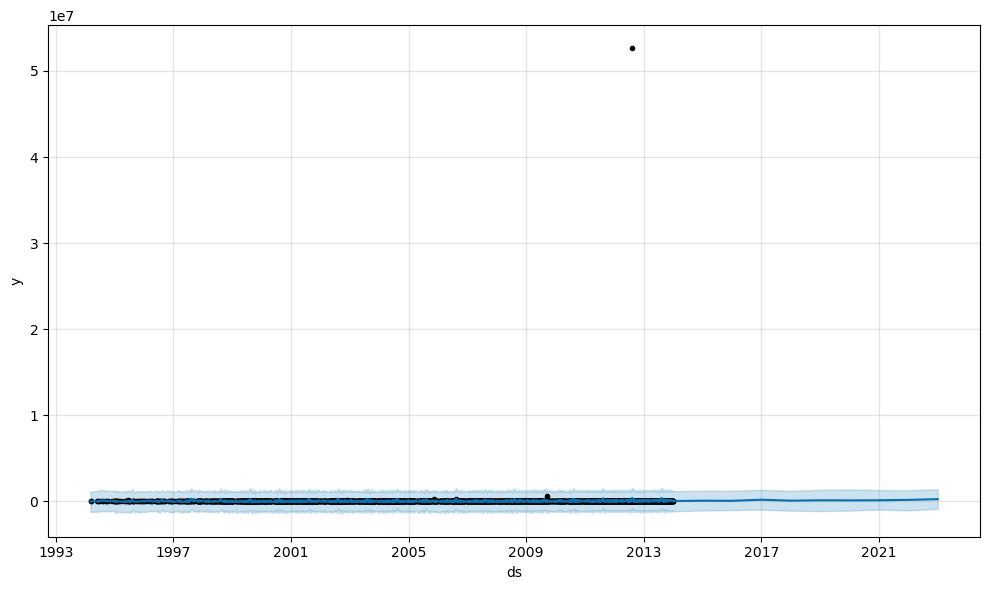

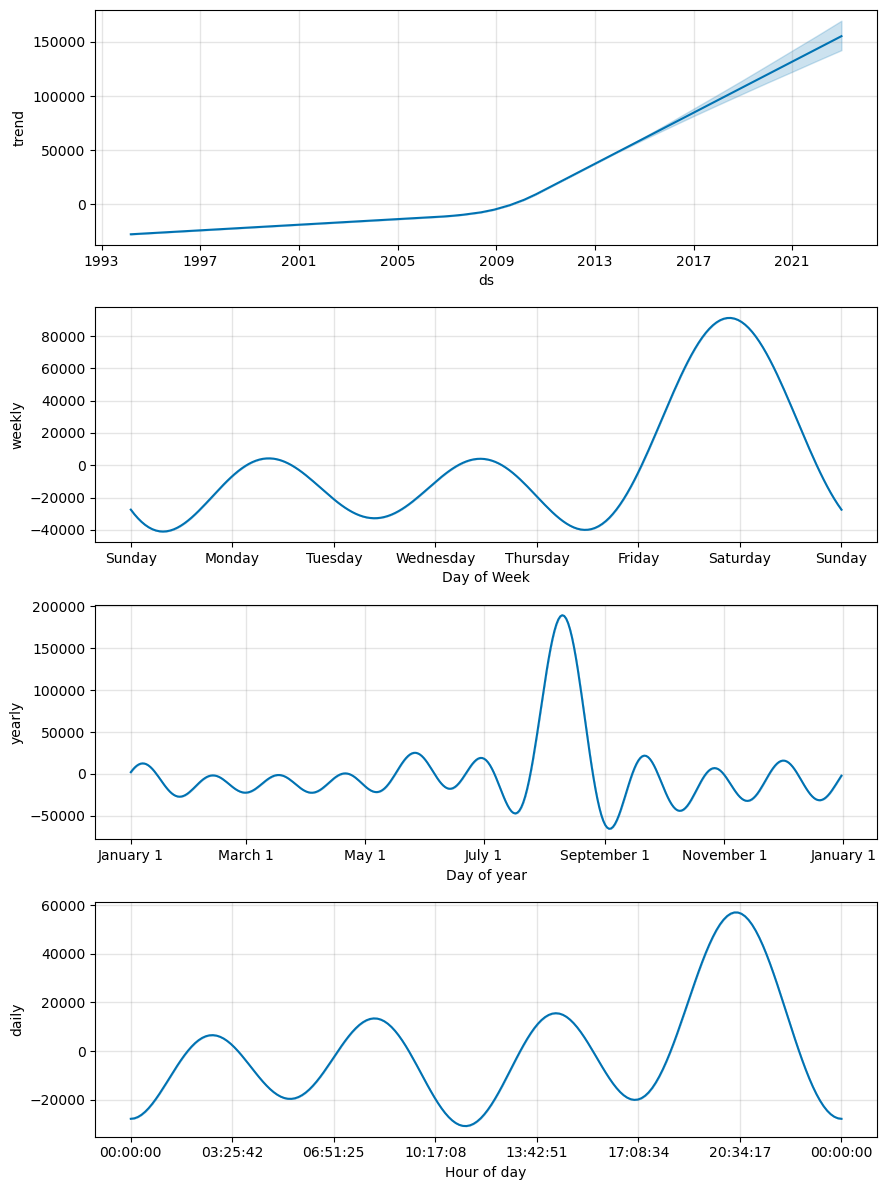

In [46]:
# creation projection model for Washington state
wa_model = Prophet()
wa_model.fit(washington_seconds_sum_df)
future_trends_wa = wa_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_wa = wa_model.predict(future_trends_wa)
wa_model.plot(forecast_trends_wa);
figures = wa_model.plot_components(forecast_trends_wa)
plt.savefig('images/forecast_washington_components.png')

11:59:11 - cmdstanpy - INFO - Chain [1] start processing
11:59:12 - cmdstanpy - INFO - Chain [1] done processing


Displaying forecasting model graph and components graph for Florida to show possibilities of UFO showings over next 10 years


c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

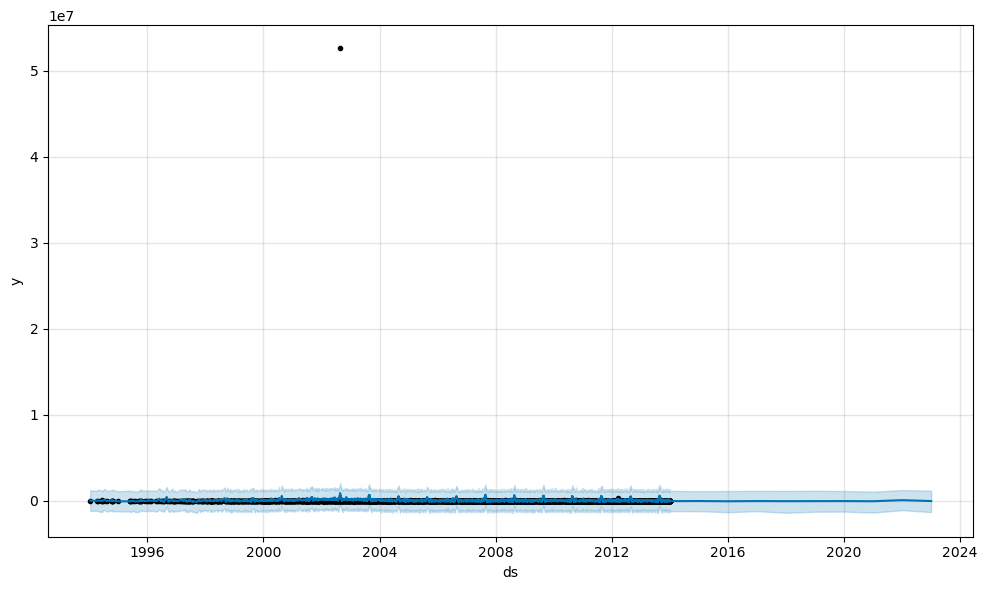

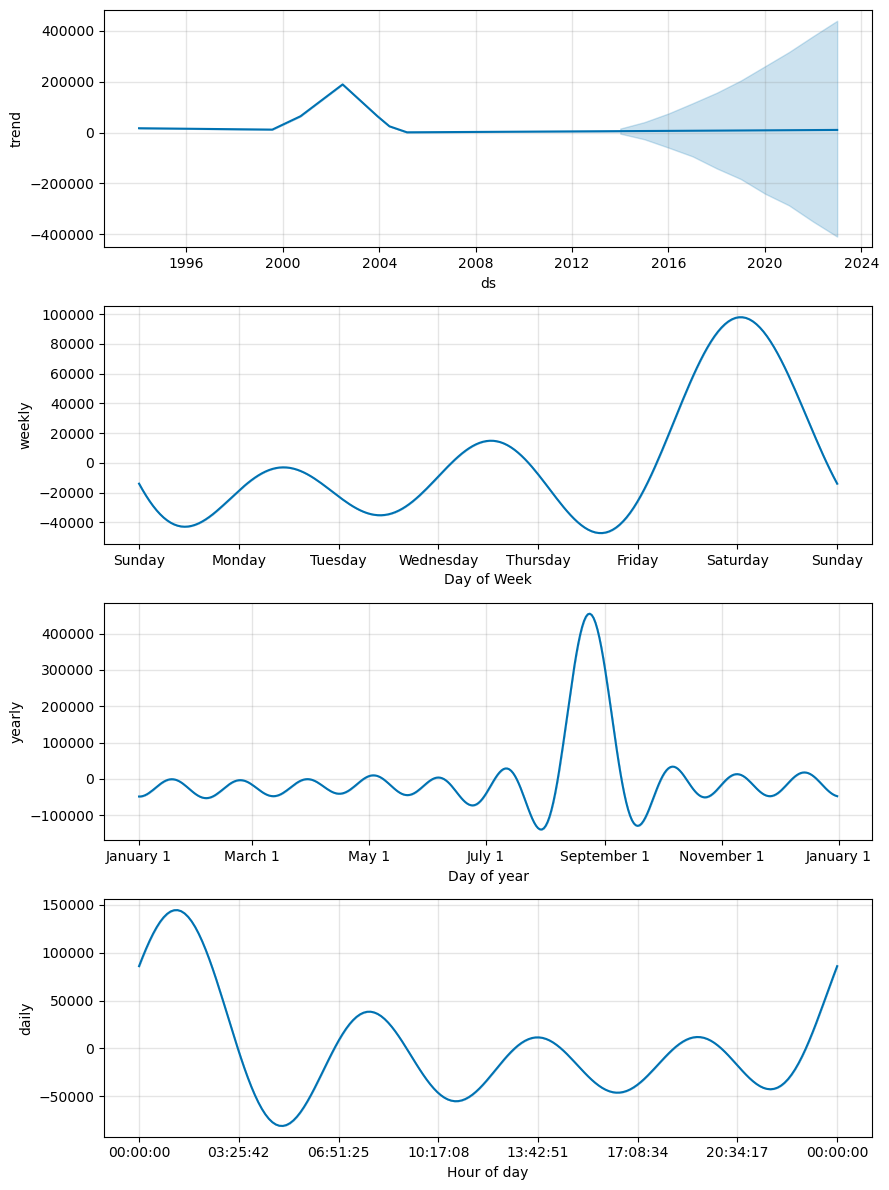

In [47]:
fl_model = Prophet()
fl_model.fit(florida_seconds_sum_df)
florida_future = fl_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
fl_forecast = fl_model.predict(florida_future)
print('Displaying forecasting model graph and components graph for Florida to show possibilities of UFO showings over next 10 years')
fl_model.plot(fl_forecast);
figures = fl_model.plot_components(fl_forecast)
plt.savefig('images/forecast_florida_components.png')

11:59:15 - cmdstanpy - INFO - Chain [1] start processing
11:59:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

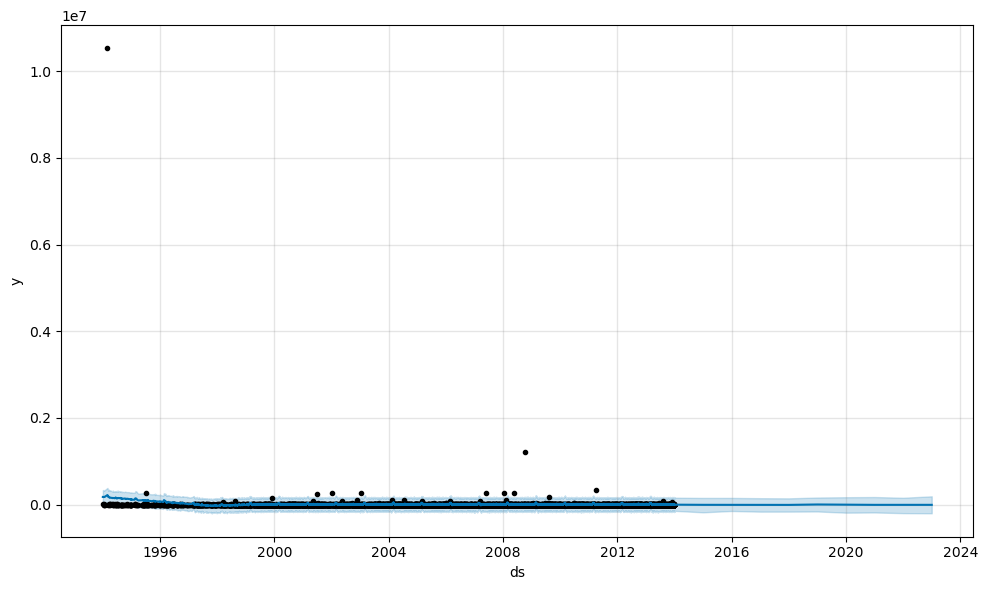

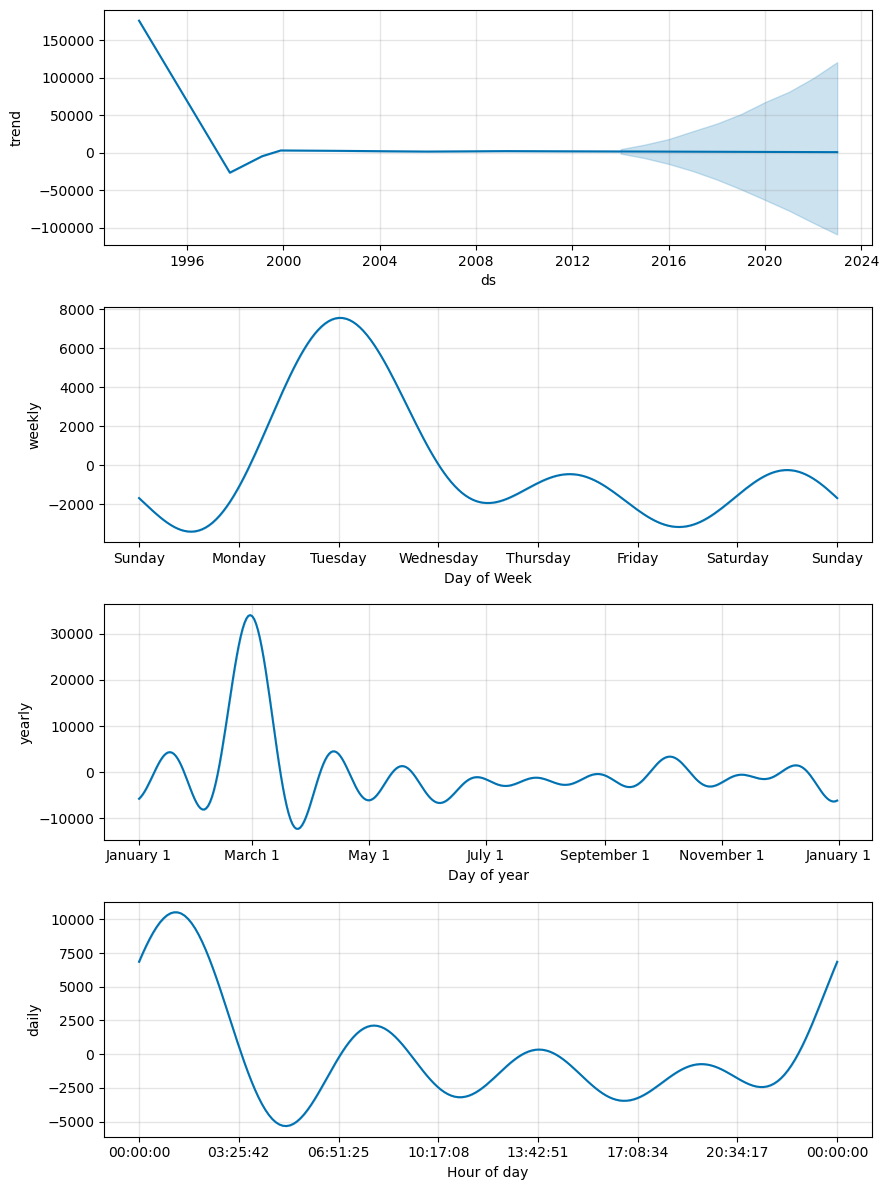

In [48]:
cali_model = Prophet()
cali_model.fit(california_seconds_sum_df)
california_future = cali_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
ca_forecast = cali_model.predict(california_future)
cali_model.plot(ca_forecast);
figures = cali_model.plot_components(ca_forecast)
plt.savefig('images/forecast_california_components.png')

11:59:20 - cmdstanpy - INFO - Chain [1] start processing
11:59:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

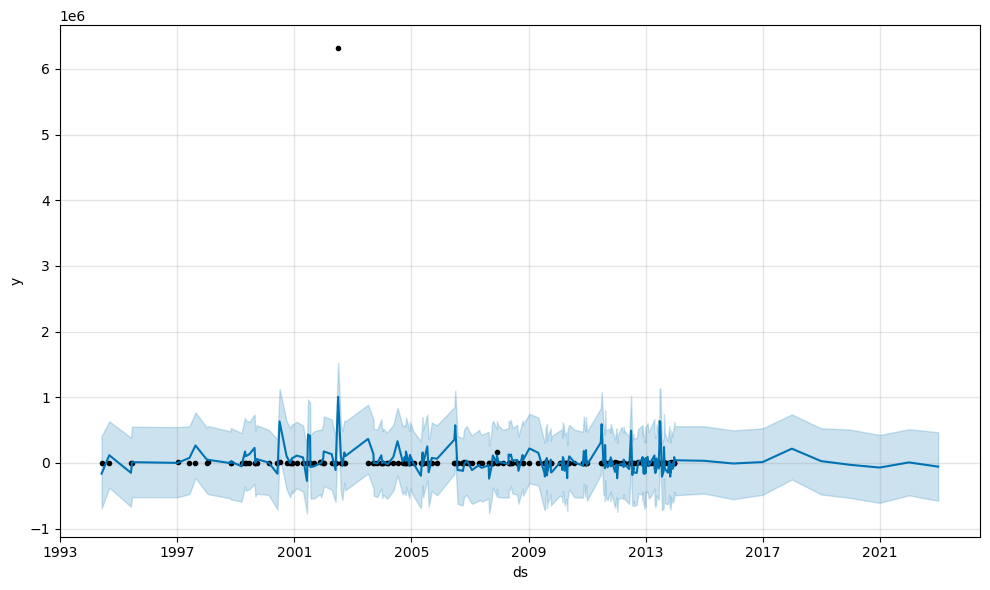

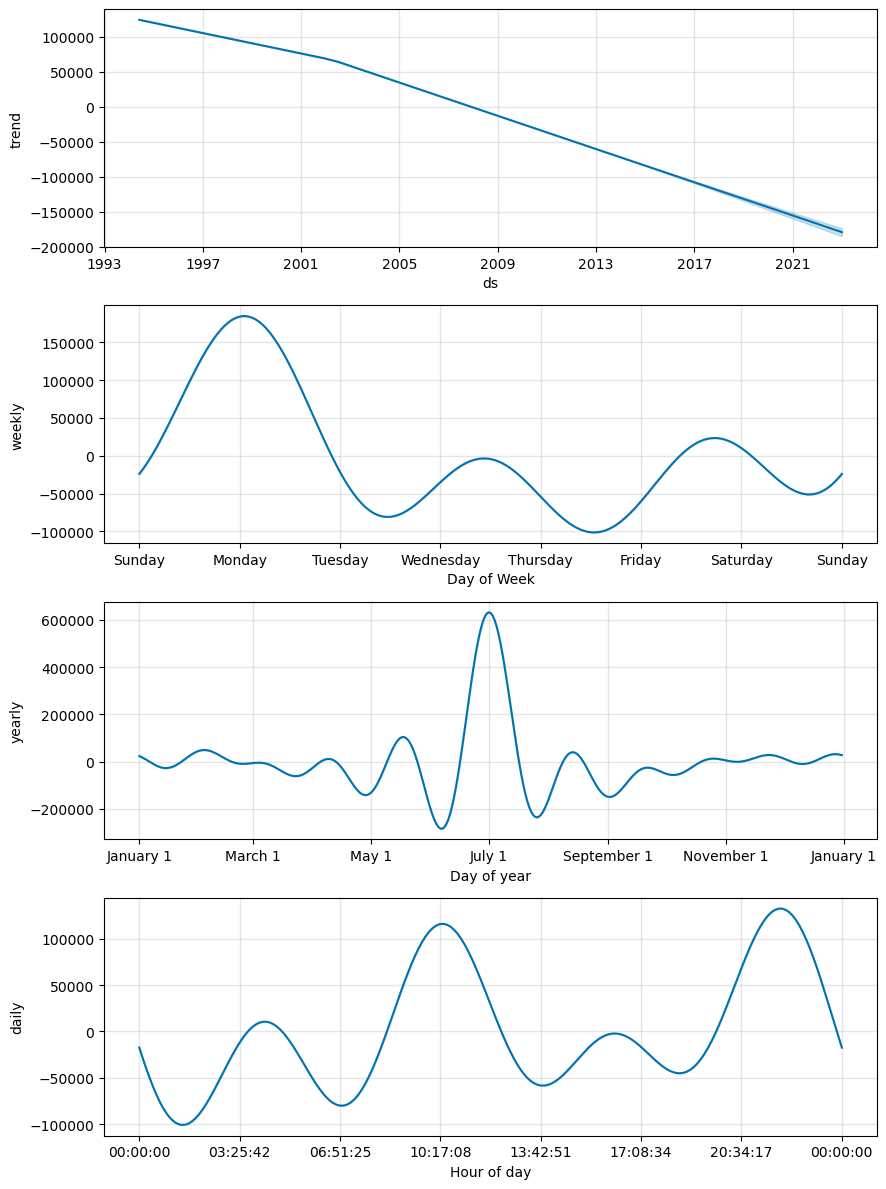

In [49]:
hi_model = Prophet()
hi_model.fit(hawaii_seconds_sum_df)
future_trends_hi = hi_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_hi = hi_model.predict(future_trends_hi)
hi_model.plot(forecast_trends_hi);
figures = hi_model.plot_components(forecast_trends_hi)
plt.savefig('images/forecast_hawaii_components.png')

11:59:22 - cmdstanpy - INFO - Chain [1] start processing
11:59:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

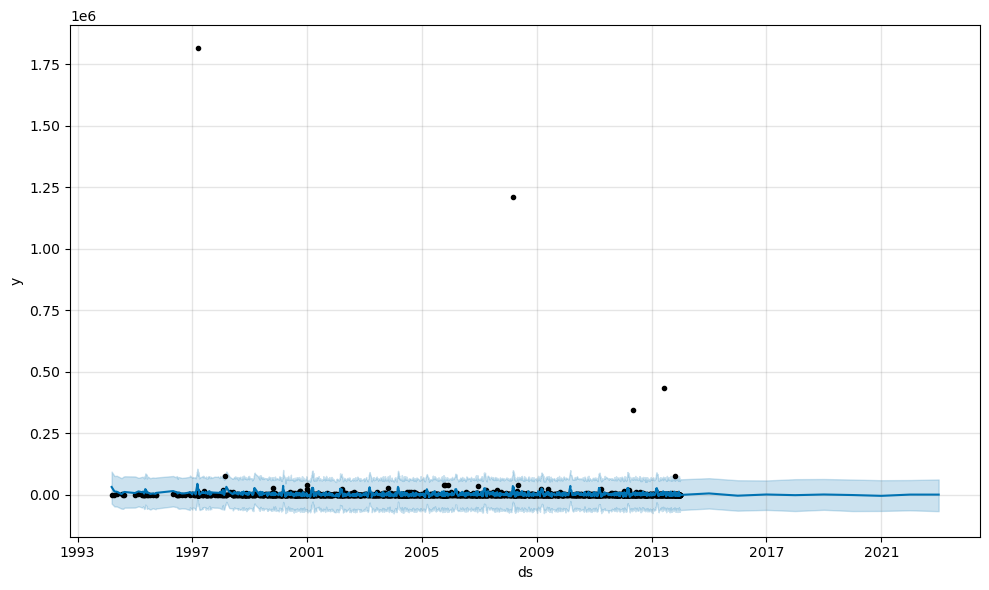

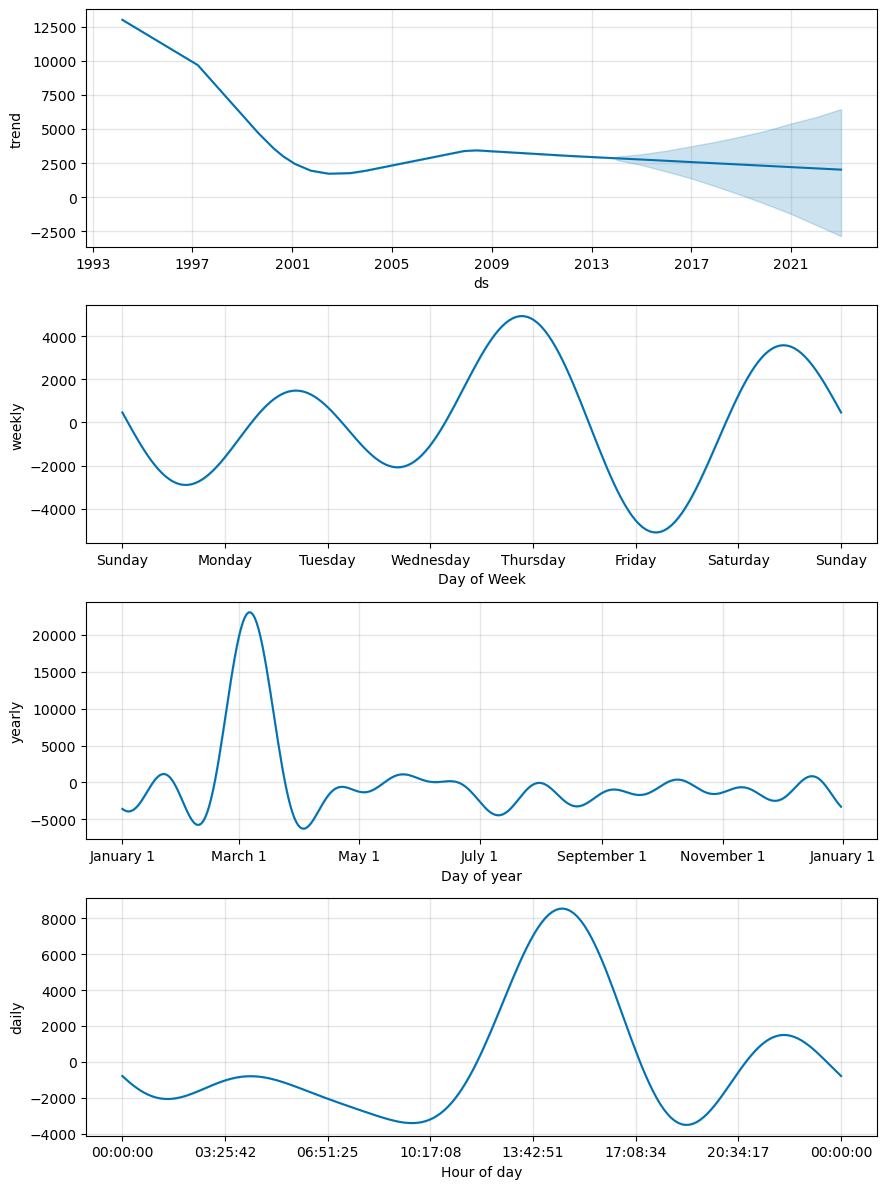

In [50]:
az_model = Prophet()
az_model.fit(arizona_seconds_sum_df)
future_trends_az = az_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_az = az_model.predict(future_trends_az)
az_model.plot(forecast_trends_az);
figures = az_model.plot_components(forecast_trends_az)
plt.savefig('images/forecast_arizona_components.png')

11:59:25 - cmdstanpy - INFO - Chain [1] start processing
11:59:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

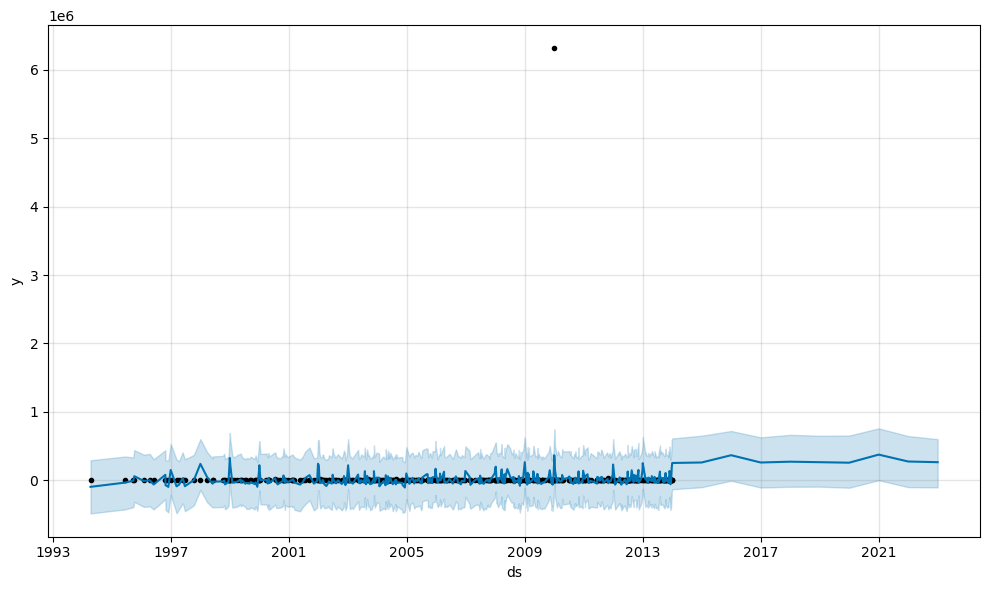

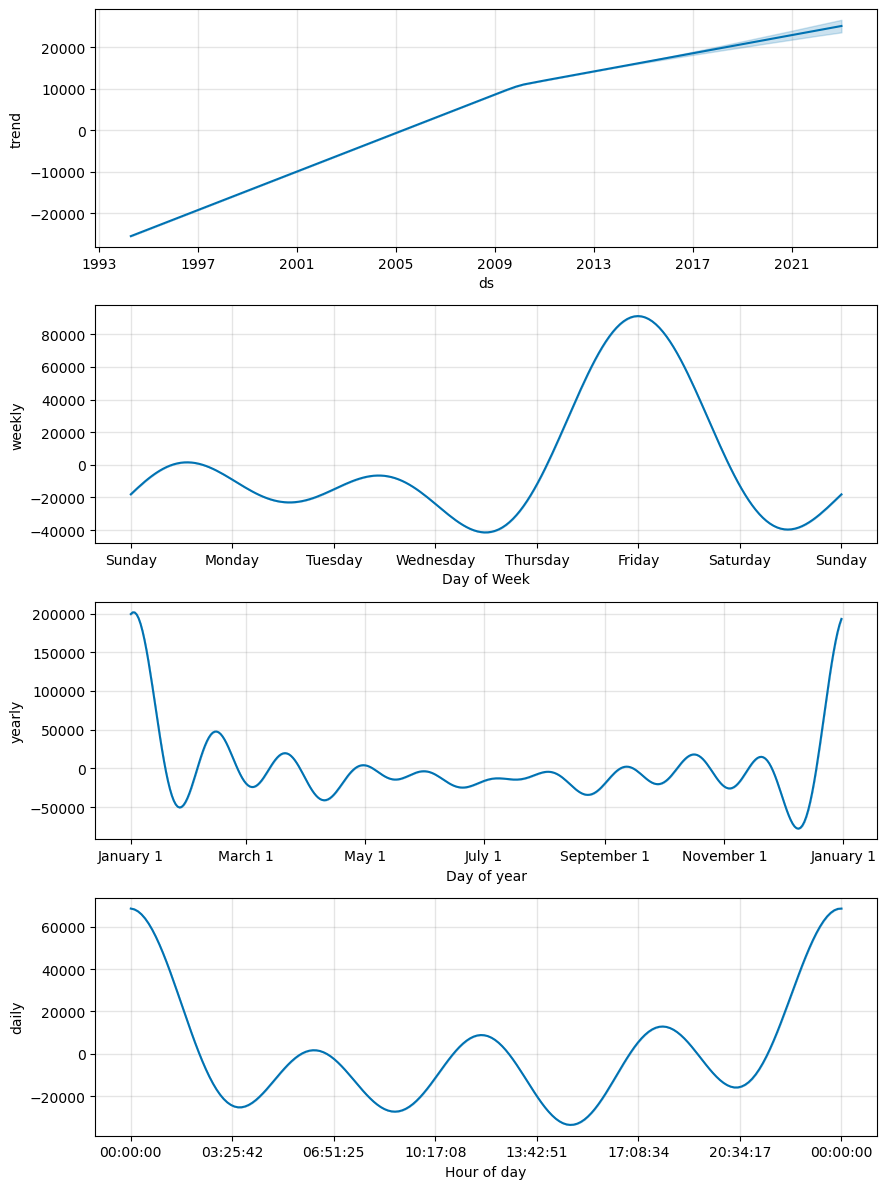

In [51]:
la_model = Prophet()
la_model.fit(louisiana_seconds_sum_df)
future_trends_la = la_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_la = la_model.predict(future_trends_la)
la_model.plot(forecast_trends_la);
figures = la_model.plot_components(forecast_trends_la)
plt.savefig('images/forecast_louisiana_components.png')

11:59:26 - cmdstanpy - INFO - Chain [1] start processing
11:59:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

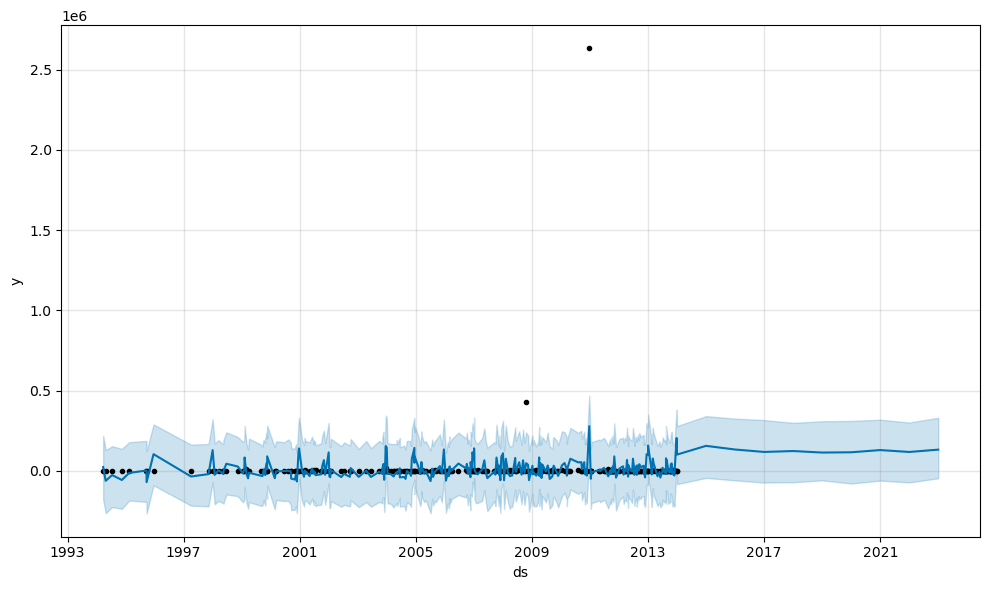

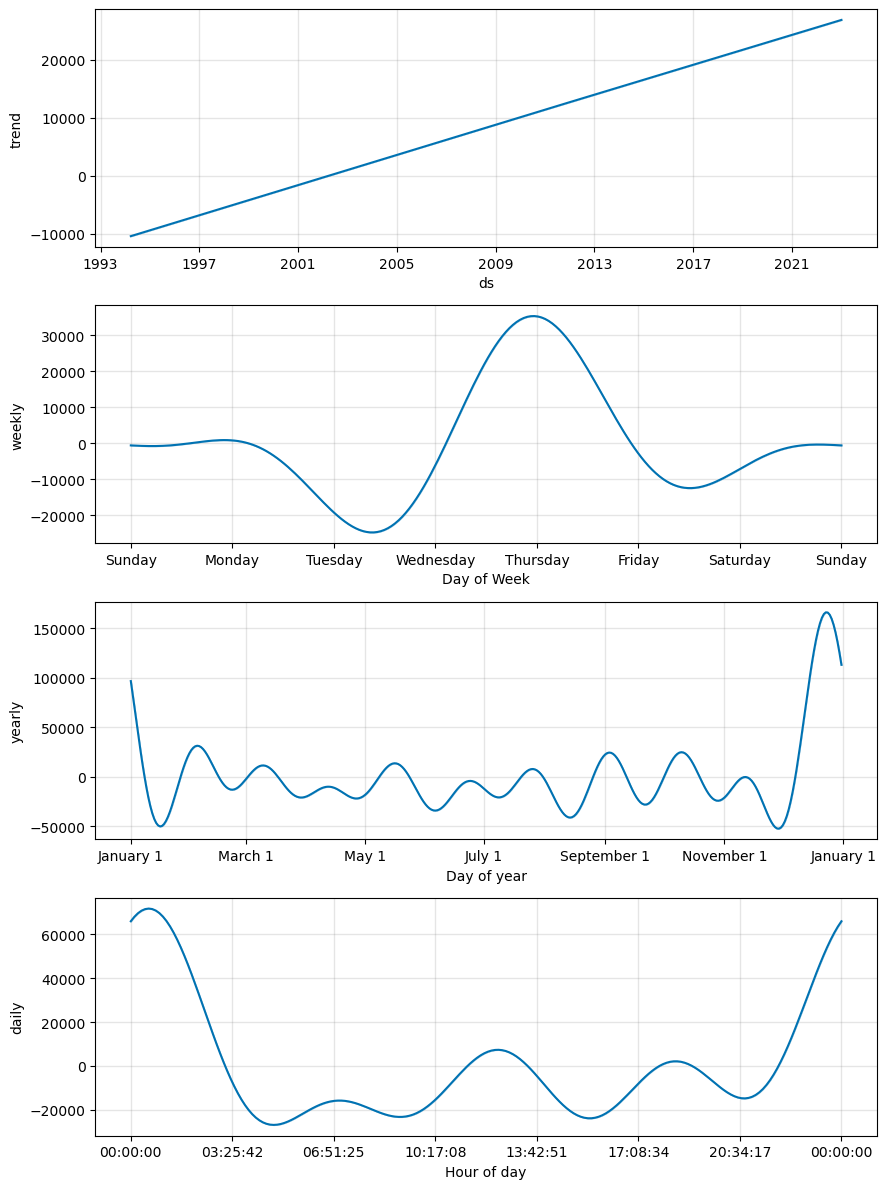

In [52]:
ms_model = Prophet()
ms_model.fit(mississippi_seconds_sum_df)
future_trends_mississippi = ms_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_mississippi = ms_model.predict(future_trends_mississippi)
ms_model.plot(forecast_trends_mississippi);
figures = ms_model.plot_components(forecast_trends_mississippi)
plt.savefig('images/forecast_mississippi_components.png')

11:59:28 - cmdstanpy - INFO - Chain [1] start processing
11:59:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

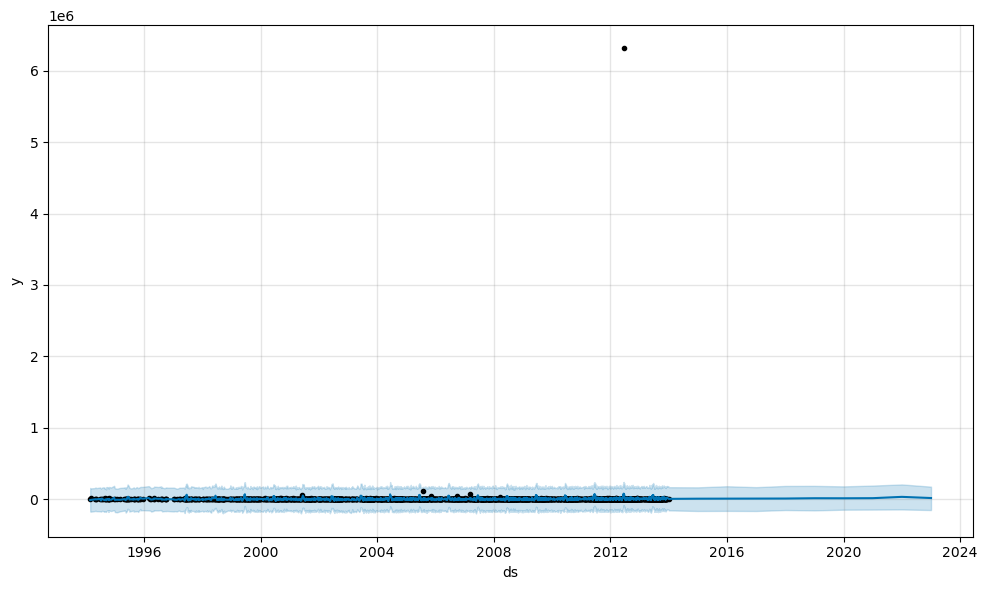

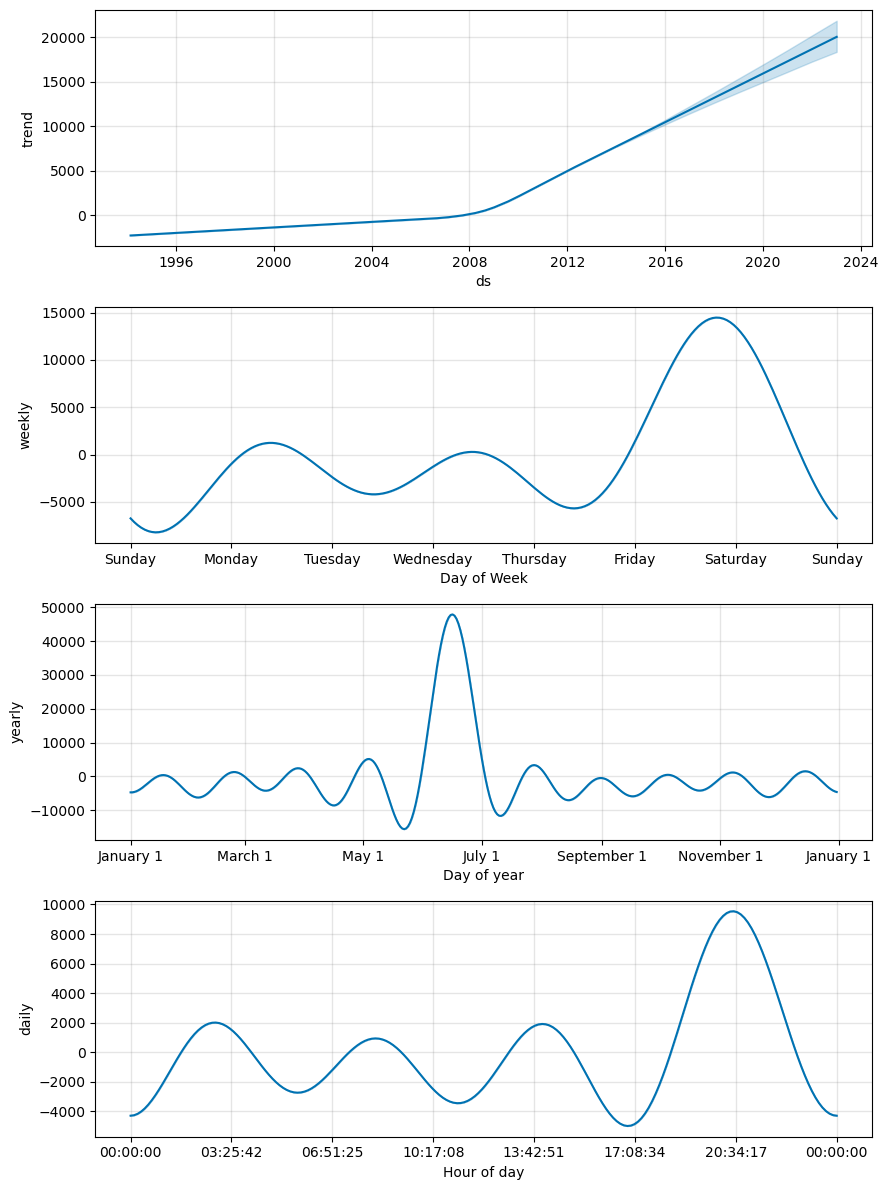

In [53]:
ny_model = Prophet()
ny_model.fit(newyork_seconds_sum_df)
future_trends_newyork = ny_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_newyork = ny_model.predict(future_trends_newyork)
ny_model.plot(forecast_trends_newyork);
figures = ny_model.plot_components(forecast_trends_newyork)
plt.savefig('images/forecast_newyork_components.png')

11:59:31 - cmdstanpy - INFO - Chain [1] start processing
11:59:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

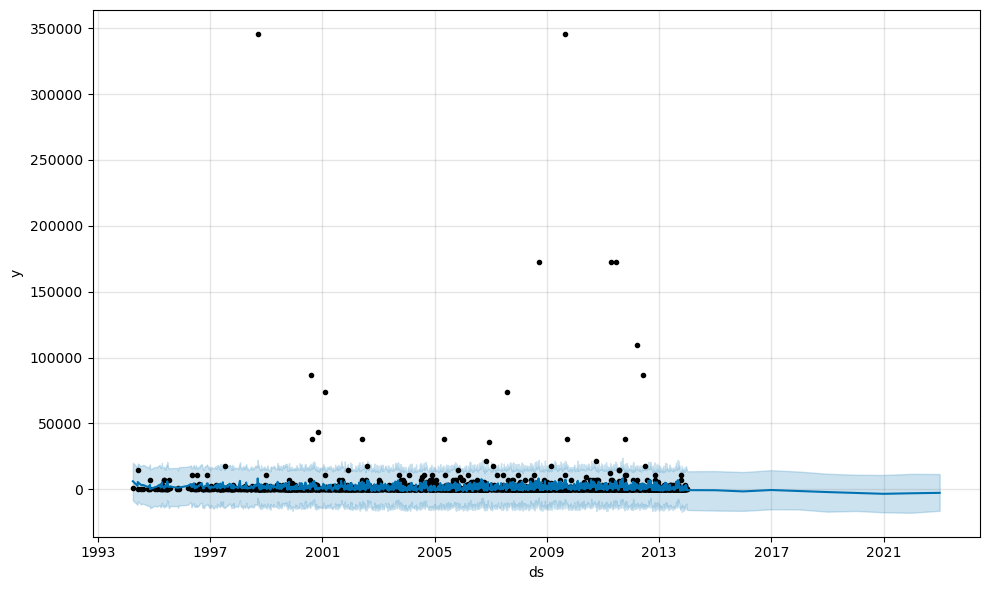

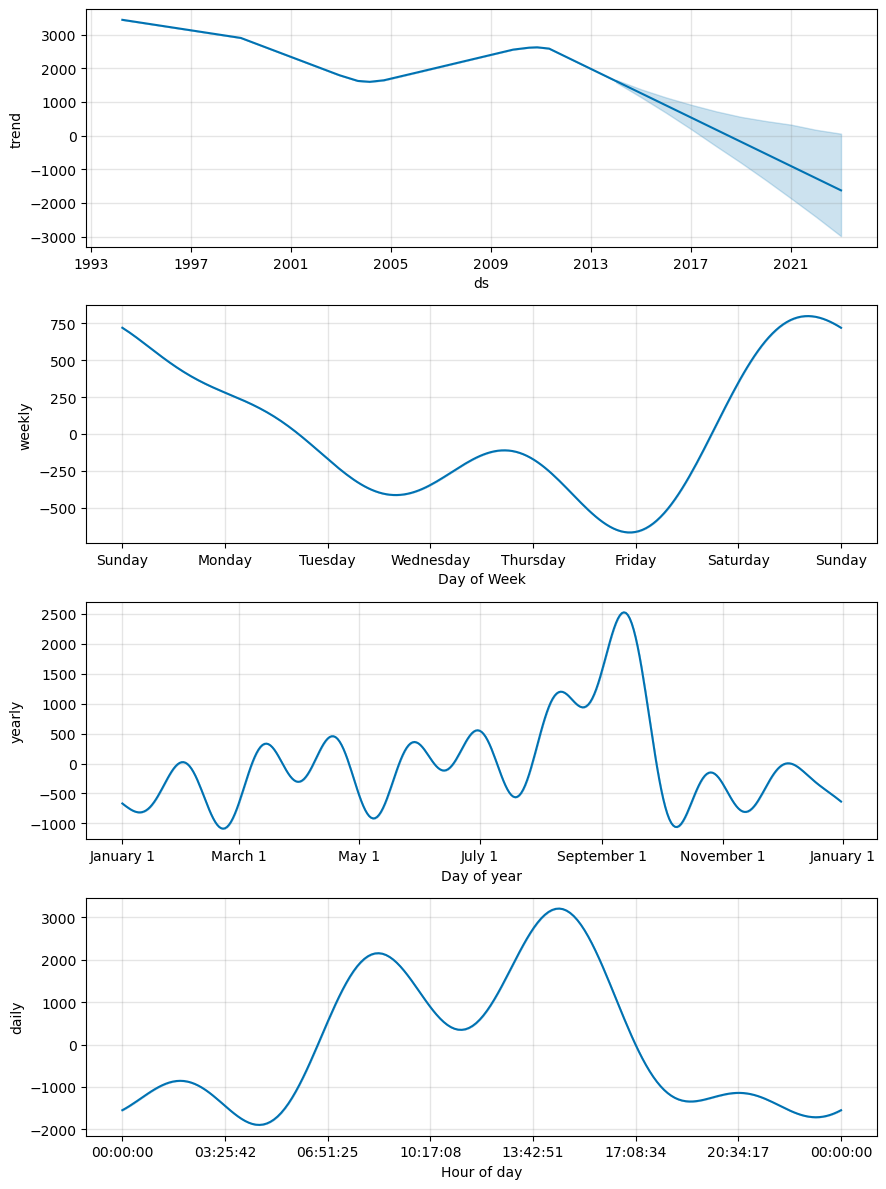

In [54]:
tx_model = Prophet()
tx_model.fit(texas_seconds_sum_df)
future_trends_texas = tx_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_texas = tx_model.predict(future_trends_texas)
tx_model.plot(forecast_trends_texas);
figures = tx_model.plot_components(forecast_trends_texas)
plt.savefig('images/forecast_texas_components.png')

11:59:34 - cmdstanpy - INFO - Chain [1] start processing
11:59:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

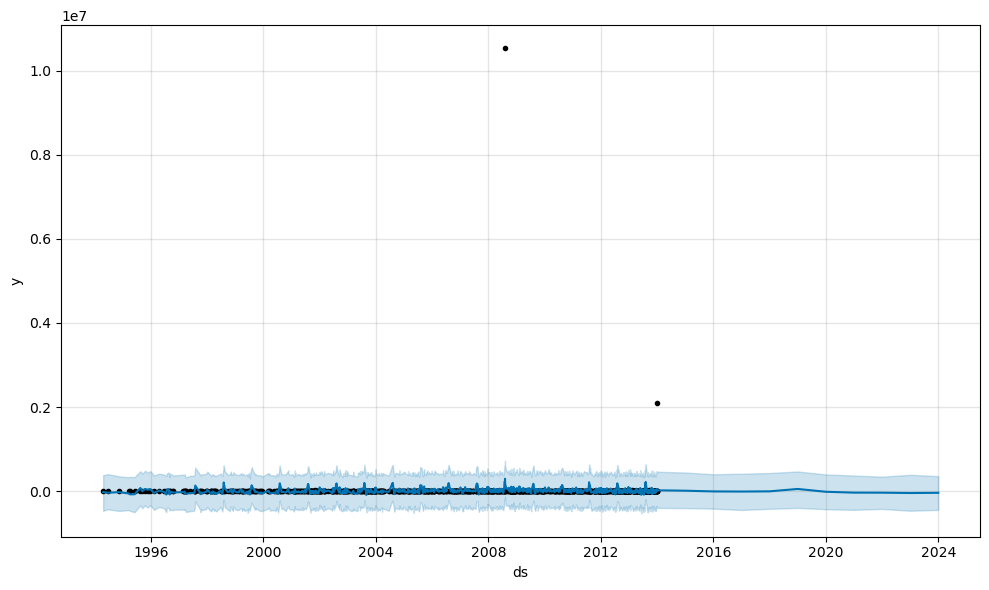

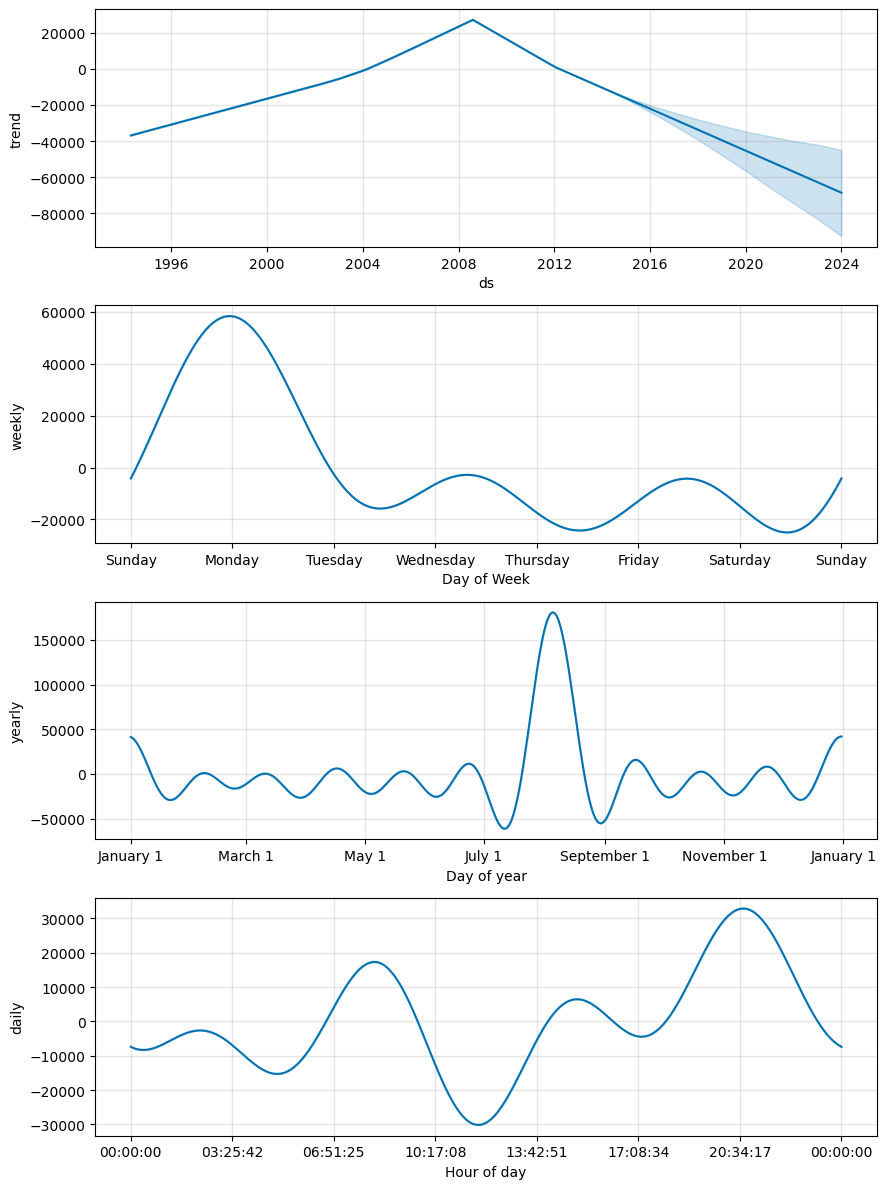

In [55]:
va_model = Prophet()
va_model.fit(virginia_seconds_sum_df)
future_trends_virginia = va_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_virginia = va_model.predict(future_trends_virginia)
va_model.plot(forecast_trends_virginia);
figures = va_model.plot_components(forecast_trends_virginia)
plt.savefig('images/forecast_virginia_components.png')

11:59:40 - cmdstanpy - INFO - Chain [1] start processing
11:59:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

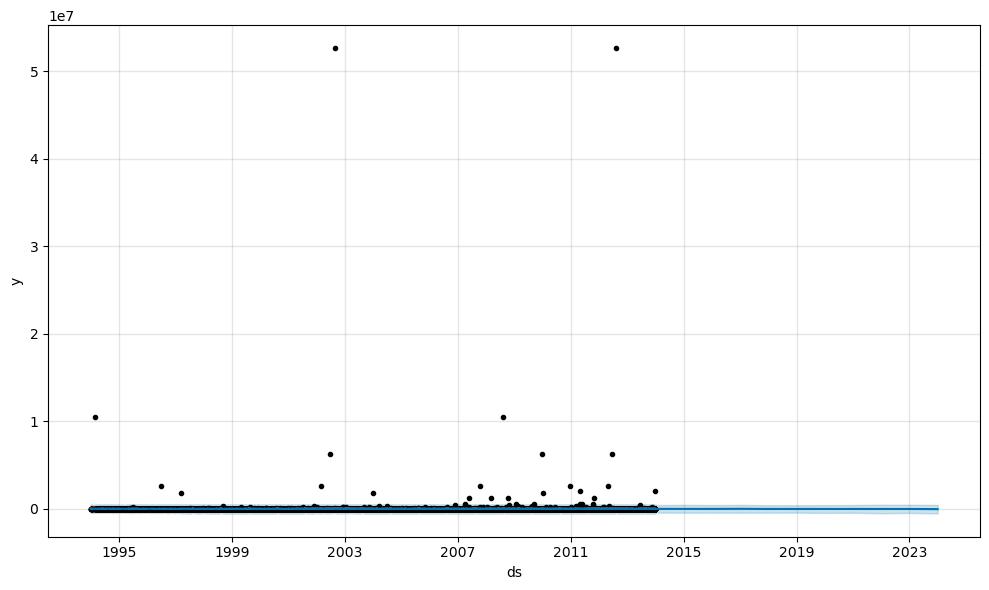

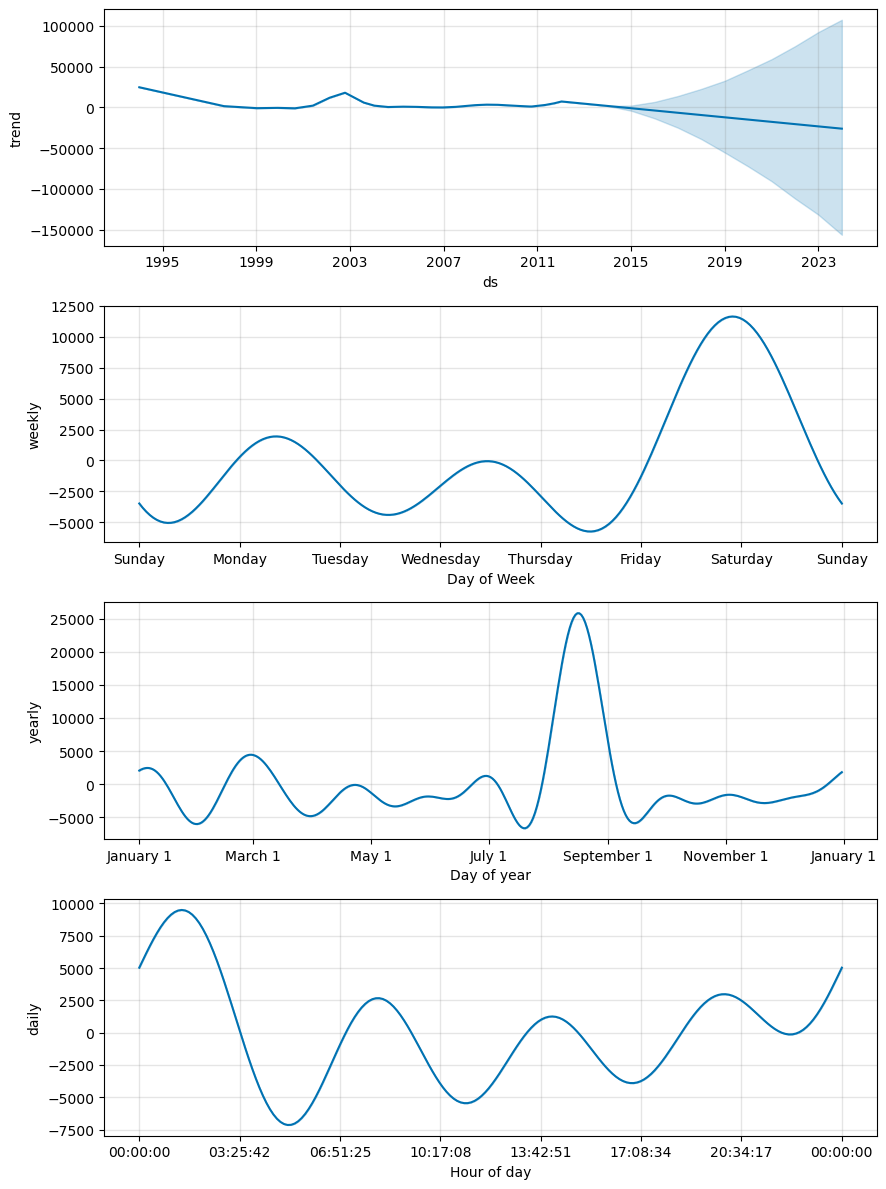

In [56]:
usa_model = Prophet()
usa_model.fit(national_seconds_sum_df)
future_trends_national = usa_model.make_future_dataframe(periods=forecasting_period, freq=forecasting_frequency)
forecast_trends_national = usa_model.predict(future_trends_national)
usa_model.plot(forecast_trends_national);
figures = usa_model.plot_components(forecast_trends_national)
plt.savefig('images/forecast_national_components.png')

In [57]:
# add a new empty column to ufo_shape_data labeled 'form'
cleaned_us_ufo_df['form'] = ''
cleaned_us_ufo_df.head()
# if value in ufo_shape_data_df['shape'] column equals cigar, circle, round, sphere, oval, egg, cylinder or disk, then value in ufo_shape_data_df['form'] column equals circular
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['cigar', 'circle', 'round', 'sphere', 'oval', 'egg', 'cylinder', 'disk']), 'form'] = 'circular'
# if value in ufo_shape_data_df['shape'] column equals fireball, flare, flash or light, then value in ufo_shape_data_df['form'] column equals light
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['fireball', 'flare', 'flash', 'light']), 'form'] = 'light'
# if value in ufo_shape_data_df['shape'] column equals chevron, delta, triangle, pyramid or cone, then value in ufo_shape_data_df['form'] column equals triangle
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['chevron', 'delta', 'triangle', 'pyramid', 'cone']), 'form'] = 'triangle'
# if value in ufo_shape_data_df['shape'] column equals formation, changed or changing, then value in ufo_shape_data_df['form'] column equals formation_changing
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['formation', 'changed', 'changing']), 'form'] = 'formation_changing'
# if value in ufo_shape_data_df['shape'] column equals diamond, hexagon, crescent, cross, rectangle or teardrop, then value in ufo_shape_data_df['form'] column equals geometric
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['diamond', 'hexagon', 'crescent', 'cross', 'rectangle', 'teardrop']), 'form'] = 'geometric'
# if value in ufo_shape_data_df['shape'] column equals other or unknown, then value in ufo_shape_data_df['form'] column equals other_unknown
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['other', 'unknown']), 'form'] = 'other_unknown'
cleaned_us_ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,1910,circular
46694,1920-06-11 21:00:00,cicero,in,us,unknown,60.0,40.1238889,-86.013333,1920,other_unknown
20951,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,41.4208333,-90.015000,1925,circular
62760,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,43.6425,-118.627500,1929,circular
26550,1931-02-15 14:00:00,holyoke (6-8 miles southwest of),co,us,oval,60.0,40.5844444,-102.301944,1931,circular


In [58]:
#agreegating count of form by grouping on form
cleaned_us_ufo_df.groupby('form').agg({'form': ['count']}).sort_values(by=[('form', 'count')], ascending=False)

,form
,count
form,
circular,20681
light,19589
other_unknown,8948
triangle,7576
formation_changing,3546
geometric,2759


In [59]:
#getting list of states from dataframe with 90 perenctile records
geocoding_top_states = us_ufo_state_top_df['state'].tolist()
geocoding_top_states

['az', 'ca', 'fl', 'hi', 'la', 'ms', 'ny', 'tx', 'va', 'wa']

In [60]:
#convert states to uppercase to be able to match with publicly sourced data
states = [s.upper() for s in geocoding_top_states]
states

['AZ', 'CA', 'FL', 'HI', 'LA', 'MS', 'NY', 'TX', 'VA', 'WA']

In [61]:
#using ready list of state abbreviation and name disctionary
#credit: https://gist.github.com/JeffPaine/3083347
abbreviation_to_name = {
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States.
    "AK": "Alaska",
    "AL": "Alabama",
    "AR": "Arkansas",
    "AZ": "Arizona",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "IA": "Iowa",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "MA": "Massachusetts",
    "MD": "Maryland",
    "ME": "Maine",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MO": "Missouri",
    "MS": "Mississippi",
    "MT": "Montana",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "NE": "Nebraska",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NV": "Nevada",
    "NY": "New York",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VA": "Virginia",
    "VT": "Vermont",
    "WA": "Washington",
    "WI": "Wisconsin",
    "WV": "West Virginia",
    "WY": "Wyoming",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Federal_district.
    "DC": "District of Columbia",
    # https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#Inhabited_territories.
    "AS": "American Samoa",
    "GU": "Guam GU",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico PR",
    "VI": "U.S. Virgin Islands",
}

In [62]:
#using list comprehension for creating list of state abbreviation and name from abbreviation_to_name
states_dict = {s.lower(): abbreviation_to_name[s] for s in states}
states_dict

{'az': 'Arizona',
 'ca': 'California',
 'fl': 'Florida',
 'hi': 'Hawaii',
 'la': 'Louisiana',
 'ms': 'Mississippi',
 'ny': 'New York',
 'tx': 'Texas',
 'va': 'Virginia',
 'wa': 'Washington'}

In [63]:
#using list comprehension for getting list of states from state_dict
states_lower_abb = [s for s in states_dict]
states_lower_abb

['az', 'ca', 'fl', 'hi', 'la', 'ms', 'ny', 'tx', 'va', 'wa']

In [64]:
#creating copy of the dataframe to maintain original data
geo_df = cleaned_us_ufo_df.loc[cleaned_us_ufo_df['state'].isin(geocoding_top_states)]
geo_df

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,1910,circular
66131,1937-08-15 21:00:00,fontana,ca,us,light,600.0,34.092222,-117.434167,1937,light
10813,1944-01-01 12:00:00,san diego,ca,us,cigar,180.0,32.7152778,-117.156389,1944,circular
46869,1945-06-01 13:30:00,jasper,fl,us,fireball,300.0,30.5180556,-82.948333,1945,light
54587,1945-07-10 01:30:00,portsmouth,va,us,formation,180.0,36.8352778,-76.298611,1945,formation_changing
...,...,...,...,...,...,...,...,...,...,...
46000,2014-05-06 23:00:00,melbourne,fl,us,sphere,45.0,28.0833333,-80.608333,2014,circular
46145,2014-05-07 09:30:00,port richey,fl,us,unknown,1.0,28.2713889,-82.719722,2014,other_unknown
46147,2014-05-07 15:00:00,san jose,ca,us,disk,30.0,37.3394444,-121.893889,2014,circular
46151,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.3302778,-119.291111,2014,light


In [65]:
#using lambda to add state_name from state_dict
geo_df['state_name'] = geo_df['state'].map(lambda x: states_dict[x])
geo_df

C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\2491460606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df['state_name'] = geo_df['state'].map(lambda x: states_dict[x])


,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form,state_name
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,1910,circular,Texas
66131,1937-08-15 21:00:00,fontana,ca,us,light,600.0,34.092222,-117.434167,1937,light,California
10813,1944-01-01 12:00:00,san diego,ca,us,cigar,180.0,32.7152778,-117.156389,1944,circular,California
46869,1945-06-01 13:30:00,jasper,fl,us,fireball,300.0,30.5180556,-82.948333,1945,light,Florida
54587,1945-07-10 01:30:00,portsmouth,va,us,formation,180.0,36.8352778,-76.298611,1945,formation_changing,Virginia
...,...,...,...,...,...,...,...,...,...,...,...
46000,2014-05-06 23:00:00,melbourne,fl,us,sphere,45.0,28.0833333,-80.608333,2014,circular,Florida
46145,2014-05-07 09:30:00,port richey,fl,us,unknown,1.0,28.2713889,-82.719722,2014,other_unknown,Florida
46147,2014-05-07 15:00:00,san jose,ca,us,disk,30.0,37.3394444,-121.893889,2014,circular,California
46151,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.3302778,-119.291111,2014,light,California


In [66]:
#adding columns for minutes and hours
geo_df["average_duration_min"] = round((geo_df['duration (seconds)'] / 60), 4)
geo_df["average_duration_hour"] = round((geo_df['average_duration_min'] / 60),4)
geo_df.sort_values(by=['state'], inplace=True)
display(geo_df.head())

C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\2015007998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df["average_duration_min"] = round((geo_df['duration (seconds)'] / 60), 4)
C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\2015007998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df["average_duration_hour"] = round((geo_df['average_duration_min'] / 60),4)
C:\Users\dipes\AppData\Local\Temp\ipykernel_25780\2015007998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form,state_name,average_duration_min,average_duration_hour
1164,2012-10-12 18:55:00,phoenix,az,us,other,300.0,33.4483333,-112.073333,2012,other_unknown,Arizona,5.0,0.0833
14506,2009-11-04 20:15:00,wellton,az,us,light,180.0,32.6727778,-114.146111,2009,light,Arizona,3.0,0.0500
23533,2005-01-28 21:50:00,mesa,az,us,light,600.0,33.4222222,-111.821944,2005,light,Arizona,10.0,0.1667
39256,2013-04-26 21:00:00,tucson,az,us,light,300.0,32.2216667,-110.925833,2013,light,Arizona,5.0,0.0833
39110,2013-04-25 22:30:00,phoenix,az,us,circle,600.0,33.4483333,-112.073333,2013,circular,Arizona,10.0,0.1667


In [67]:
#Geographic projection support may require: cartopy, geoviews.
#!pip install cartopy
#!pip install geoviews

In [68]:
import panel as pn # for interactive geo-bubble chart

In [69]:
# Ensure there are no leading/trailing spaces in column names
geo_df.columns = geo_df.columns.str.strip()

# Drop the unnamed column if it exists
geo_df = geo_df.loc[:, ~geo_df.columns.str.contains('^Unnamed')]

# Ensure that 'longitude' and 'latitude' columns are of numeric type
geo_df['longitude'] = pd.to_numeric(geo_df['longitude'], errors='coerce')
geo_df['latitude'] = pd.to_numeric(geo_df['latitude'], errors='coerce')

#Check the columns to ensure they are correctly named and of numeric type
print("Column Names:")
print(geo_df.columns)
print("\nData Types:")
print(geo_df[['longitude', 'latitude']].dtypes)
print("\nFirst Few Rows:")
print(geo_df[['longitude', 'latitude']].head())

# Ensure that 'longitude' and 'latitude' columns exist and are correctly named
if 'longitude' in geo_df.columns and 'latitude' in geo_df.columns:
    # Plotting using hvplot
    try:
        fig = geo_df.hvplot.points(
            'longitude', 'latitude',  geo=True, c='shape',
            color = 'red',
            s='average_duration_hour', #for size of the bubble
            #width=1300, height=700,
            hover_cols=['year', 'city', 'form'], #columns for hover box
            groupby=['state_name'], # to use for widgets
            # #, #'city'],
            by='form', # interactive legends
            muted_color = 'white', # when legend is clicked off
            muted_alpha = 0.1, # when legend is clicked off
            widgets={'state_name': pn.widgets.RadioButtonGroup},#clickable buttons
            alpha=0.5, tiles='OSM',
            xlim=(-40,-165), ylim=(18,62), widget_location='bottom',
            #xlim=(-85,-130), ylim=(24,51), #fixing latlong for ease of viewing 
        )
        display(fig)  # Use display to render the plot inline in Jupyter
    except Exception as e:
        print(f"Error while plotting: {e}")
else:
    print("The columns 'longitude' and 'latitude' must be present in the DataFrame.")

Column Names:
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'latitude', 'longitude', 'year', 'form', 'state_name',
       'average_duration_min', 'average_duration_hour'],
      dtype='object')

Data Types:
longitude    float64
latitude     float64
dtype: object

First Few Rows:
        longitude   latitude
1164  -112.073333  33.448333
14506 -114.146111  32.672778
23533 -111.821944  33.422222
39256 -110.925833  32.221667
39110 -112.073333  33.448333


BokehModel(combine_events=True, render_bundle={'docs_json': {'200d85a5-b73b-4cda-98a2-dfb23614ba3c': {'version…